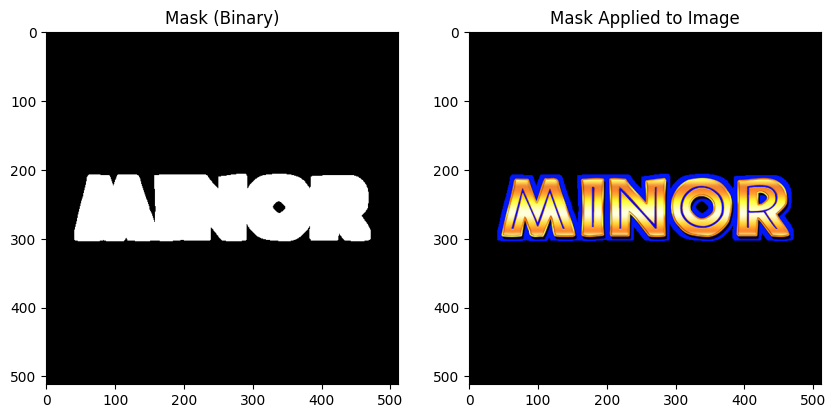

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image

symbol = 'minor'

image_path = f'/root/reskint-test-assets/{symbol}.png'
image = cv2.imread(image_path)

# Convert the image to RGB (from BGR, which OpenCV uses by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define a broader color range for the text in HSV
# Adjust these values to match the color of the text more accurately
lower_color = np.array([15, 50, 50])
upper_color = np.array([40, 255, 255])

# Create a mask to isolate the text
mask = cv2.inRange(hsv_image, lower_color, upper_color)

# Apply morphological operations to clean up the mask
kernel = np.ones((7, 7), np.uint8)
mask = cv2.dilate(mask, kernel, iterations=2)
# mask = cv2.erode(mask, kernel, iterations=2)

# Convert the mask to a three-channel RGB image for easier use
mask_rgb = cv2.merge([mask, mask, mask])

# Display the final mask and the masked image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Mask (Binary)')
plt.imshow(mask, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Mask Applied to Image')
masked_image = cv2.bitwise_and(image_rgb, mask_rgb)
plt.imshow(masked_image)

plt.show()

In [19]:
mask_output_path = f'/root/masks/{symbol}_mask.jpg'
cv2.imwrite(mask_output_path, mask)

print(f"Mask saved at {mask_output_path}")

Mask saved at /root/masks/minor_mask.jpg
